### Import necessary libraries

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the dataset
df=pd.read_csv(r"D:\DATA SCIENCE\Kaggle\CSV\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
# first few rows of the dataframe
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
# last few rows of the dataframe
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


### Data Cleaning and Preprocessing

In [9]:
# Check for missing values across the dataset
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [10]:
# Drop rows with missing values in 'Years of Experience' and 'Salary'
df_clean = df.dropna(subset=['Years of Experience', 'Salary'])

In [11]:
# Report the size of the cleaned dataframe
print('\nShape of dataframe before cleaning:', df.shape)
print('Shape of dataframe after cleaning:', df_clean.shape)


Shape of dataframe before cleaning: (6704, 6)
Shape of dataframe after cleaning: (6699, 6)


### Exploratory Data Analysis

In [13]:
# Numerical columns analysis
numeric_df = df_clean.select_dtypes(include=[np.number])

# If there are 4 or more numeric columns, create a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

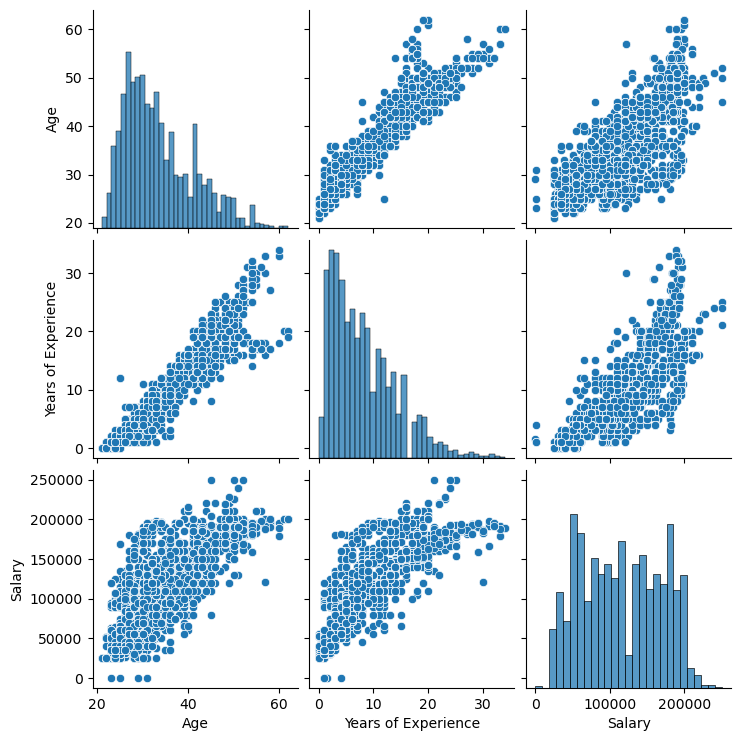

In [14]:
# Pair plot for numerical relations
sns.pairplot(numeric_df)
plt.show()

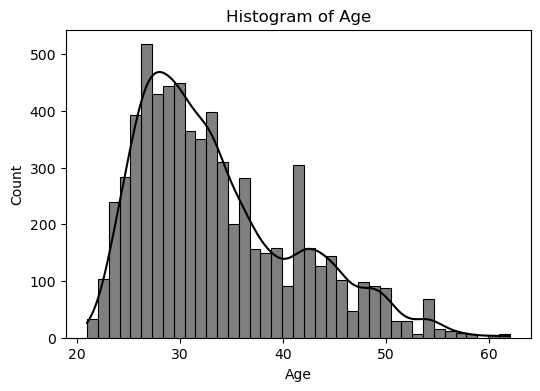

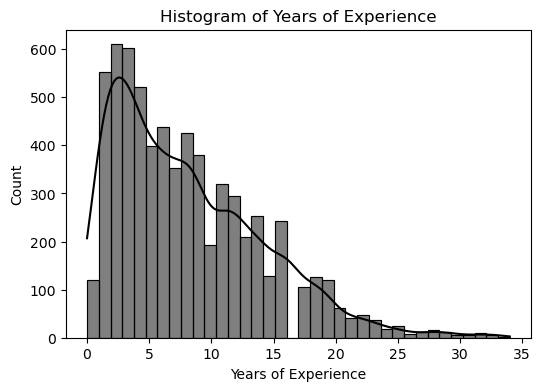

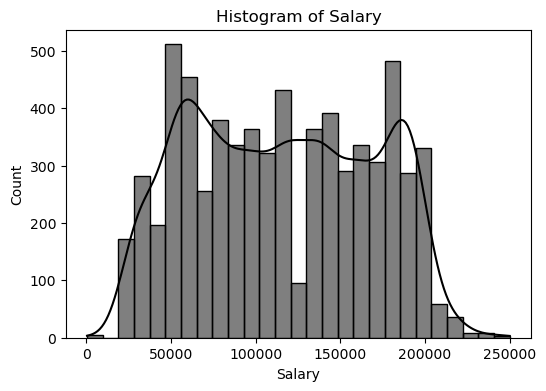

In [15]:
# Histograms for numeric columns
numeric_columns = numeric_df.columns
for col in numeric_columns:
    plt.figure(figsize=(6,4),)
    sns.histplot(numeric_df[col], kde=True, color='black')
    plt.title(f'Histogram of {col}')
    plt.show()

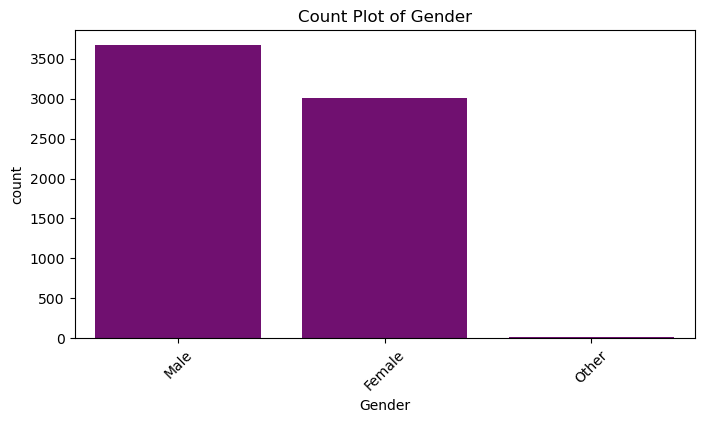

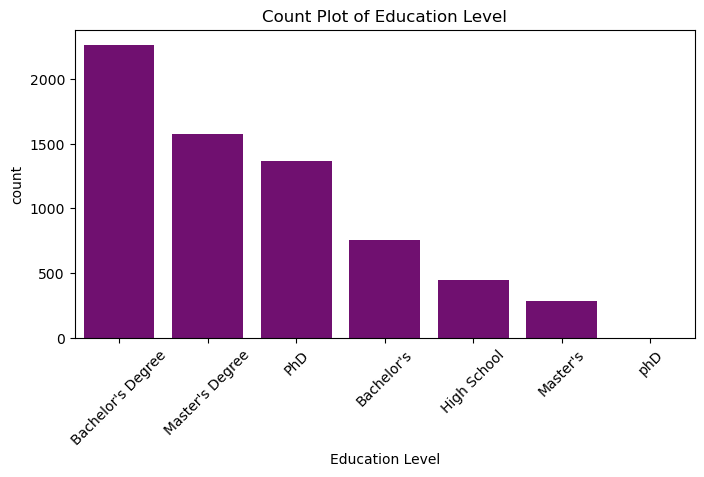

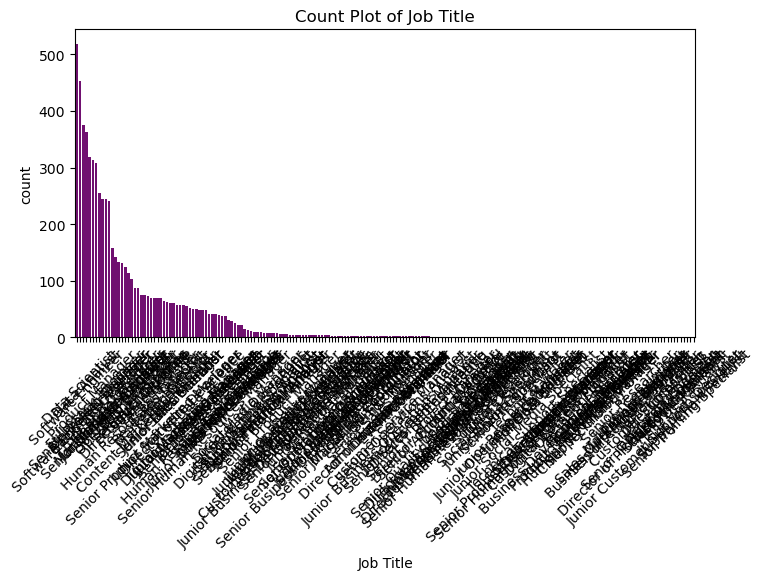

In [16]:
# Count plots for categorical columns
categorical_columns = ['Gender', 'Education Level', 'Job Title']
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index,color='purple')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

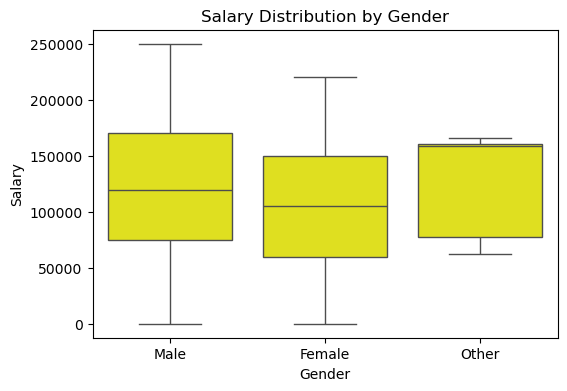

In [17]:
# Box plot for Salary distribution across Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Salary', data=df_clean, color='yellow')
plt.title('Salary Distribution by Gender')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
# Prepare the data by dropping any remaining missing values in the relevant columns
df_model = df_clean.dropna(subset=['Years of Experience', 'Salary'])
# Define predictor (X) and target (y) variable
X = df_model[['Years of Experience']]
y = df_model['Salary']
# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Predictor Model Evaluation:')
print('R^2 Score: {:.4f}'.format(r2))
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))

Predictor Model Evaluation:
R^2 Score: 0.6670
Mean Absolute Error: 24722.1014
Mean Squared Error: 946833177.7094


### Conclusion and Future Work

In [22]:
df_sorted = df.sort_values(by=['Years of Experience', 'Salary'], ascending=[True, True])
df_sorted.to_csv('Salary Prediction.csv', index=False)